# Under- and overfitting, model selection

## Preliminaries

In the first set of exercises you had to implement the training and evaluation of the linear regression and $k$-NN methods from scratch in order to practice your `numpy` skills. From this set of exercises onward, you can use the implementations provided in `scikit-learn` or other higher-level libraries. We start this set of exercises by demonstrating some of the features of `scikit-learn`.

For example, implementation of linear regression model fitting with an analytical solution for the parameters is provided by the class `sklearn.linar_model.LinearRegression`. You can train a linear regression model in the following way:

In [9]:
import numpy as np
from sklearn import datasets, linear_model

# load the diabetes dataset
diabetes = datasets.load_diabetes()

# use only one feature
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# create linear regression object
model = linear_model.LinearRegression()

# train the model using the training dataset
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Let's visualize the training dataset and the learned regression model.

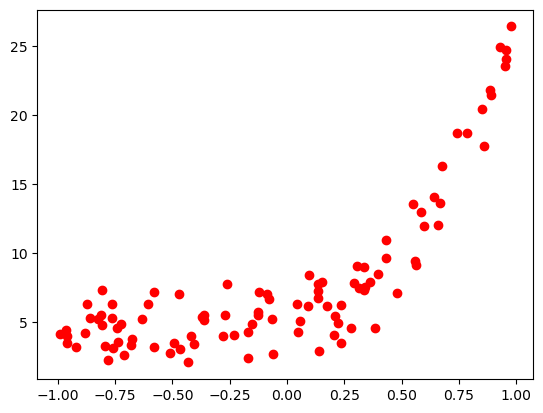

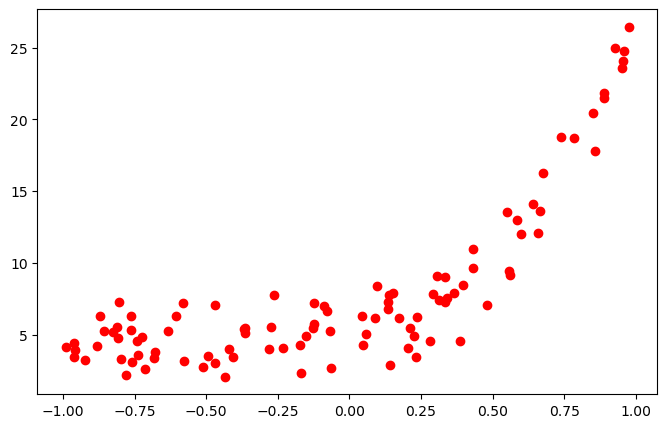

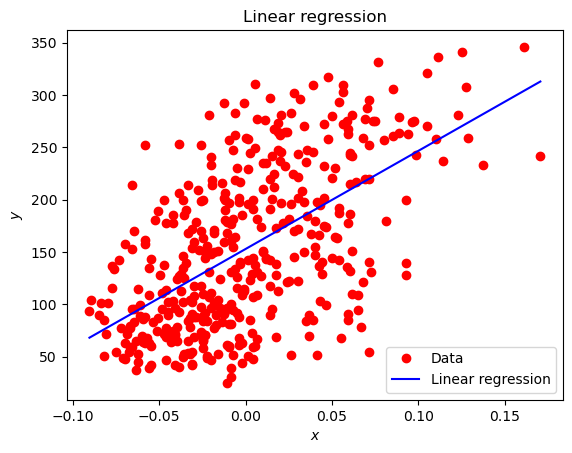

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(X_train, y_train, 'r.', markersize=12)
X_edge = np.array([np.min(X_train, 0), np.max(X_train, 0)])
plt.plot(X_edge, model.predict(X_edge), 'b-')
plt.legend(('Data', 'Linear regression'), loc='lower right')
plt.title('Linear regression')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Once trained, the model can be used to make predictions on the test data:

In [11]:
# Make predictions using the testing dataset
prediction = model.predict(X_test)

The next step (not shown here) is to evaluate the performance of the trained model.

Note that the `scikit-learn` interface works by first initializing an object from the class that implements the machine learning model (linear regression in this case) and then fitting the initialized model using the data in the training set. Finally, the trained (fitted) model can be used to make predictions on unseen data. In fact, all models implemented in this library follow the same *initialize-fit-predict* programming interface. For example, a $k$-NN classifier can be trained in the following way:

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors

breast_cancer = datasets.load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

# make use of the train_test_split() utility function instead
# of manually dividing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)
# initialize a 3-NN classifier
model = neighbors.KNeighborsClassifier(n_neighbors=3)

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)

Note that the features in the breast cancer dataset have different scales (some have on average very small absolute values, and some very large), which means that the distance metric used by $k$-NN will be dominated by the features with large values. You can use any of the number of feature transformation methods implemented in `scikit-learn` to scale the features. For example, you can use the `sklearn.preprocessing.StandardScaler` method to transform all features to a have a zero mean and unit variance:

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

The scaler has its own parameters which are the means and standard deviations of the features estimated from the training set. If you train a model with the scaled features, you will have to remember to also apply the scaling transformation every time you make a prediction on new unseen and unscaled data. This is somewhat prone to error. One option for making the code more robust is to create a processing pipeline that includes the scaling and $k$-NN models in a sequence:

In [14]:
from sklearn.pipeline import Pipeline

knn = neighbors.KNeighborsClassifier(n_neighbors=3)

model = Pipeline([
                 ("scaler", scaler),
                 ("knn", knn)
                ])

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)


If you are curious, more information about the design of the `scikit-learn` application programming interface (API) can be found [in this paper](https://arxiv.org/pdf/1309.0238.pdf). 

## Exercises

### Bias-variance decomposition

Show that the mean squared error of the estimate of a parameter can be decomposed into an expression that includes both the bias and variance (Eq. 5.53-5.54 in "Deep learning" by Goodfellow et al.). 

**Bias–variance decomposition (all steps, clear & simple)**

1. **Define the three quantities.**

$$
\operatorname{Bias}(\hat{\theta})=\mathbb{E}[\hat{\theta}]-\theta,\qquad
\operatorname{Var}(\hat{\theta})=\mathbb{E}\!\left[(\hat{\theta}-\mathbb{E}[\hat{\theta}])^{2}\right],\qquad
\operatorname{MSE}(\hat{\theta})=\mathbb{E}\!\left[(\hat{\theta}-\theta)^{2}\right].
$$

2. **Start from the definition of MSE.**

$$
\operatorname{MSE}(\hat{\theta})=\mathbb{E}\!\left[(\hat{\theta}-\theta)^{2}\right].
$$

3. **Add and subtract the mean of the estimator inside the square.**

$$
\operatorname{MSE}(\hat{\theta})
=\mathbb{E}\!\left[\big(\hat{\theta}-\mathbb{E}[\hat{\theta}]+\mathbb{E}[\hat{\theta}]-\theta\big)^{2}\right].
$$

4. **Name the two pieces to expand easily.**
   Let

$$
a=\hat{\theta}-\mathbb{E}[\hat{\theta}],\qquad b=\mathbb{E}[\hat{\theta}]-\theta
$$

(so $a$ is random with mean $0$; $b$ is a constant).

5. **Expand the square $(a+b)^2$.**

$$
\operatorname{MSE}(\hat{\theta})=\mathbb{E}[a^{2}]+2\,\mathbb{E}[a]\,b+b^{2}.
$$

6. **Show the cross term is zero (linearity of expectation).**

$$
\mathbb{E}[a]=\mathbb{E}\!\left[\hat{\theta}-\mathbb{E}[\hat{\theta}]\right]
=\mathbb{E}[\hat{\theta}]-\mathbb{E}[\hat{\theta}]=0
\;\;\Rightarrow\;\; 2\,\mathbb{E}[a]\,b=0.
$$

7. **Identify the variance term.**

$$
\mathbb{E}[a^{2}]
=\mathbb{E}\!\left[(\hat{\theta}-\mathbb{E}[\hat{\theta}])^{2}\right]
=\operatorname{Var}(\hat{\theta}).
$$

8. **Identify the squared bias term.**

$$
b^{2}=(\mathbb{E}[\hat{\theta}]-\theta)^{2}
=\operatorname{Bias}(\hat{\theta})^{2}.
$$

9. **Combine the pieces (final result).**

$$
\boxed{\operatorname{MSE}(\hat{\theta})=\operatorname{Var}(\hat{\theta})+\operatorname{Bias}(\hat{\theta})^{2}}.
$$



### Polynomial regression

For this exercise we will be using generated data to better show the effects of the different polynomial orders.
The data is created using the make_polynomial_regression function.

In [ ]:
%matplotlib inline

def generate_dataset(n=100, degree=1, noise=1, factors=None):
    # Generates a dataset by adding random noise to a randomly
    # generated polynomial function.
    
    x = np.random.uniform(low=-1, high=1, size=n)
    
    factors = np.random.uniform(0, 10, degree+1)
    
    y = np.zeros(x.shape)
    
    for idx in range(degree+1):
        y += factors[idx] * (x ** idx)

    # add noise
    y += np.random.normal(-noise, noise, n)
    
    return x, y

# load generated data
np.random.seed(0)

# Genereer en split de data
X, y = generate_dataset(n=100, degree=4, noise=1.5)
X = X.reshape(-1, 1)  # Zorg dat X een 2D array is

plt.plot(X, y, 'r.', markersize=12)

Implement polynomial regression using the `sklearn.preprocessing.PolynomialFeatures` transformation. Using the `sklearn.grid_search.GridSearchCV` class, perform a grid search of the polynomial order hyperparameter space with cross-validation and report the performance on an independent test set.

Plot a learning curve that show the validation accuracy as a function of the polynomial order. 

<p><font color='#d19b9bff'>Which models have a high bias, and which models have high variance? Motivate your answer.</font><p>
    
Repeat this experiment, this time using the diabetes dataset instead of the generated data.

Train MSE (genormaliseerd): 1.88
Test MSE (genormaliseerd): 4.32
Train R^2 (genormaliseerd): 0.941
Test R^2 (genormaliseerd): 0.893


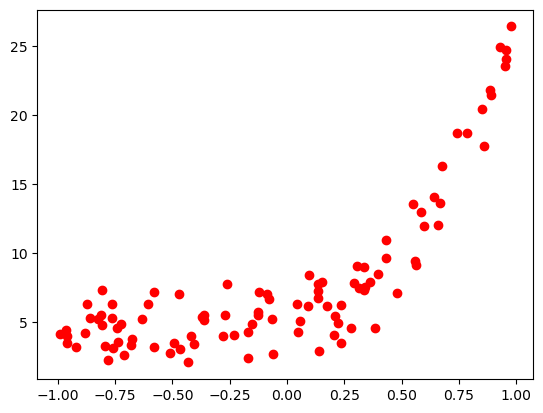

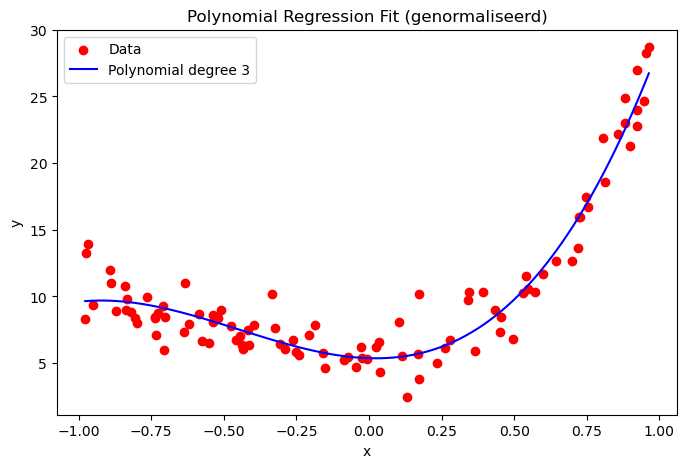

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliseer de features X vóór PolynomialFeatures en voer polynomial regression uit
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Normaliseren
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynoomtransformatie
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Lineaire regression 
model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# MSE en R^2
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Train MSE (genormaliseerd): {mse_train:.2f}")
print(f"Test MSE (genormaliseerd): {mse_test:.2f}")
print(f"Train R^2 (genormaliseerd): {r2_train:.3f}")
print(f"Test R^2 (genormaliseerd): {r2_test:.3f}")

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='red', label='Data')

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_scaled = scaler.transform(X_plot)
X_plot_poly = poly.transform(X_plot_scaled)
y_plot = model.predict(X_plot_poly)
plt.plot(X_plot, y_plot, color='blue', label=f'Polynomial degree {degree}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Fit (genormaliseerd)')
plt.legend()
plt.show()

Best polynomial degree: 4
Best cross-validated MSE: 2.10
Test set MSE: 3.68
Test set R^2: 0.909


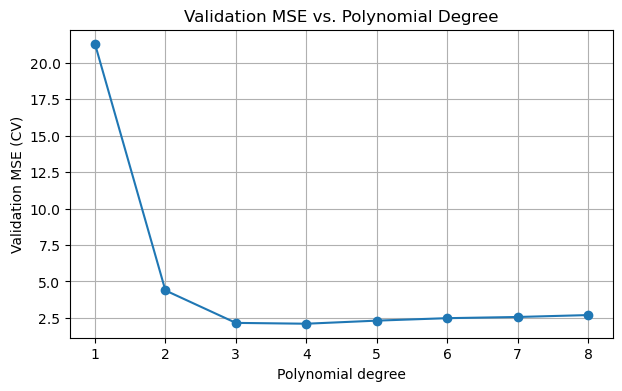

In [17]:
# Grid search for best polynomial degree using cross-validation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define a pipeline: polynomial features + linear regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('reg', LinearRegression())
])

# Define parameter grid: try degrees 1 through 8
param_grid = {'poly__degree': list(range(1, 9))}

# Use 5-fold cross-validation
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Best degree and corresponding CV score
print(f"Best polynomial degree: {grid.best_params_['poly__degree']}")
print(f"Best cross-validated MSE: {-grid.best_score_:.2f}")

# Evaluate on independent test set
y_test_pred = grid.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test set MSE: {test_mse:.2f}")
print(f"Test set R^2: {test_r2:.3f}")

# Plot learning curve: degree vs. validation MSE
results = grid.cv_results_
degrees = param_grid['poly__degree']
mean_mse = -results['mean_test_score']
plt.figure(figsize=(7,4))
plt.plot(degrees, mean_mse, marker='o')
plt.xlabel('Polynomial degree')
plt.ylabel('Validation MSE (CV)')
plt.title('Validation MSE vs. Polynomial Degree')
plt.grid(True)
plt.show()

### ROC curve analysis
A common method to evaluate binary classifiers is the receiver operating characteristic (ROC) curve. Similar to the week one practicals, implement a $k$-NN classifier on the breast cancer dataset, however, his time use the $k$-NN pipeline from the preliminary. Train the model for different values of $k$ and evaluate their respective performance with an ROC curve, use the `sklearn.metrics.roc_curve` function.

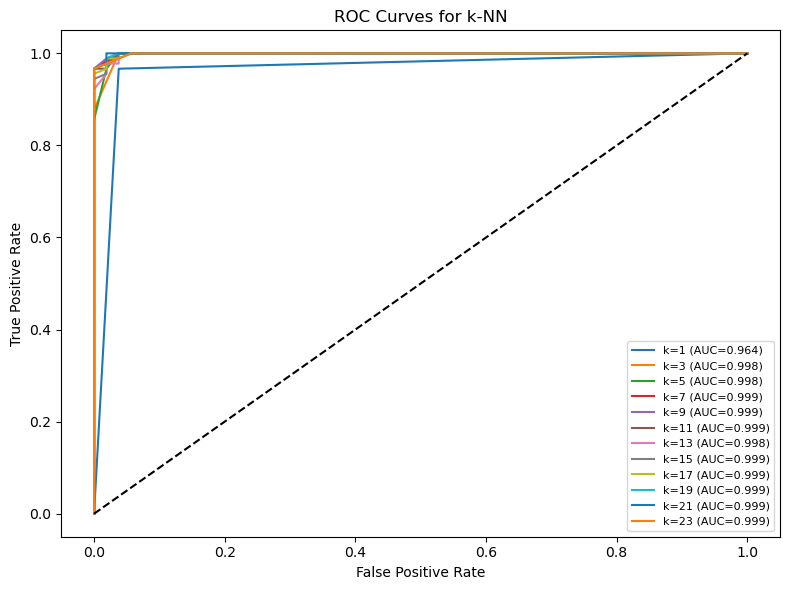

AUC per k:
  k= 1: AUC=0.96447
  k= 3: AUC=0.99769
  k= 5: AUC=0.99801
  k= 7: AUC=0.99937
  k= 9: AUC=0.99948
  k=11: AUC=0.99916
  k=13: AUC=0.99832
  k=15: AUC=0.99874
  k=17: AUC=0.99895
  k=19: AUC=0.99937
  k=21: AUC=0.99948
  k=23: AUC=0.99906

Best k by AUC: k=9 (AUC=0.99948)


In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)


def plot_roc(X_train, X_test, y_train, y_test, k_values):
    ''' function to plot ROC curves for a list of k values'''
    scaler = StandardScaler()
    aucs = {}                   # dictionary to store AUC values for each k

    plt.figure(figsize=(8, 6))
    
    for k in k_values:
        # build pipeline with scaler + knn
        knn = neighbors.KNeighborsClassifier(n_neighbors=k)
        model = Pipeline([
                 ("scaler", scaler),
                 ("knn", knn)
                ])
        
        model.fit(X_train, y_train)
        
        # predict probabilities
        y_score = model.predict_proba(X_test)[:, 1]
        
        # compute ROC + AUC
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        aucs[k] = roc_auc
        
        # plot ROC curve
        plt.plot(fpr, tpr, label=f"k={k} (AUC={roc_auc:.3f})")

    # add propability line (AUC=0.5)
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.title("ROC Curves for k-NN")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    plt.show()
    
    # print the area under the curve for each k
    print("AUC per k:")
    for k, score in aucs.items():
        print(f"  k={k:>2}: AUC={score:.5f}")
    
    best_k = max(aucs, key=aucs.get)
    print(f"\nBest k by AUC: k={best_k} (AUC={aucs[best_k]:.5f})")
    return aucs


# define k values
k_values = list(range(1, 25, 2)) # only odd values of k to avoid ties

aucs = plot_roc(X_train, X_test, y_train, y_test, k_values)



### $F_1$ score and Dice similarity coefficient

The Dice similarity coefficient is a very popular evaluation measure for image segmentation applications. Assuming that $A$ is the ground truth segmentation of an object represented as a binary image, and $B$ is the binary output of an image segmentation method, the Dice similarity coefficient is computed as:

$\text{Dice}(A,B) = \frac{2|A\cap B|}{|A| + |B|}$

where $|\cdot|$ represents the cardinality of the objects (e.g. $|A|$ is the number of non-zero pixels in the ground truth segmentation).

For example, the Dice similarity can be computed in the following way:

In [19]:
# generate some test objecys
A = np.zeros((32, 32))
A[10:-10, 10:-10] = 1
B = np.zeros((32, 32))
B[5:-15, 5:-15] = 1

dice = 2*np.sum(A*B)/(np.sum(A)+np.sum(B))

# display the results
plt.plot()
plt.imshow(A)
plt.imshow(B, alpha=0.7)

print(dice)

0.3402777777777778


<p><font color='#e3acacff'>Show that the $F_1$ score, which is the harmonic mean of precision and recall, is equivalent to the Dice similarity coefficient</font><p>

In [ ]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline


# We will use the breast cancer dataset again since it is a classification problem (easy to define true positives, false positives, etc.)

X_cancer = breast_cancer.data
y_cancer = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, stratify=y_cancer, random_state=40)

# train model in the same way as the examle in one of the previous cells
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

model = Pipeline([
                 ("scaler", scaler),
                 ("knn", knn)
                ])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# We now know the predicted and true y_test data, lets first compute the dice similarity coefficient
dice = 2*np.sum(y_test*y_pred)/(np.sum(y_test)+np.sum(y_pred))

# Now lets compute the F1-score using the sklearn function
f1 = f1_score(y_test, y_pred)

# Now display the results
print(f"The dice similarity coefficient is: {dice}")
print(f"The F1-score is:                    {f1}")

The dice similarity coefficient is: 0.989010989010989
The F1-score is:                    0.989010989010989


***Conclusion***: The dice coefficient is indeed equal tot the F1 score, which makes sense if you look at the formulas for the dice coefficient and the f1 score. The formula for the f1 score is: 

$$
F_1 = \frac{2 \cdot TP}{2 \cdot TP + FP + FN}
$$

The f1 score is a function of the true positives, false positives and and false negatives. The upper part the devision in the f1 score formula contains all the data points for which the predicted y-value is equal to the true one (this is also true for the dice formula (${2|A\cap B|}$)). The lower part o is a collection of all the other elements: the TP's, FP's and FN's (note: no TN since this model is focussed on prediciting the TP's as good as possible), the lower part of the dice equation does exactly the same (${|A| + |B|}$). Mathematically speaking, both formulas are the same so it makes sense that both methods have the same result.